# Сравнение на решенията на maximal subarray problem

Целта на този notebook е да покаже графично разликата в 3 решения на проблема:
* найвно n^3 решение
* подобрено, но все пак далеч от оптимално, n^2 решение.
* n*logn решение, използвайки divide and conquer

Това постигаме, като засичаме скоростта на алгоритмите с малък брой входове и чрез тях възстановяваме цялата графика при всички n (размери на входния масив). Не обръщайте внимание на кода, той не засяга курса по ДАА. Интересна е последната клетка на notebook-а.

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("~/Documents/daa/csv/maxsubarr.csv")
df['mean'] = df.apply(lambda x: x[2:7].mean(), axis=1)

bv = df.complexity=='cub'
cub = df[bv].copy()
cub.index = range(0, cub.shape[0])

bv = df.complexity=='quad'
quad = df[bv].copy()
quad.index = range(0, quad.shape[0])

bv = df.complexity=='nlogn'
nlogn = df[bv].copy()
nlogn.index = range(0, nlogn.shape[0])

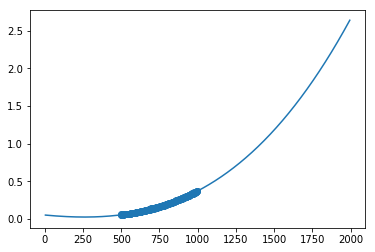

In [3]:
cub['n^2'] = cub.n.apply(lambda x: x*x)
cub['n^3'] = cub.n.apply(lambda x: x*x*x)

X = cub[['n', 'n^2', 'n^3']]
y = cub['mean']

model_cub = LinearRegression().fit(X, y)

xs = np.arange(start=5, stop=2000, step=10)
M = pd.DataFrame(data={'n':xs, 'n^2':np.power(xs, 2), 'n^3':np.power(xs, 3)})
ys = model_cub.predict(M)

plt.plot(xs,ys);
plt.scatter(cub['n'], y);

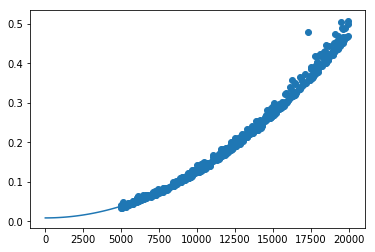

In [4]:
quad['n^2'] = quad.n.apply(lambda x: x*x)

X = quad[['n', 'n^2']]
y = quad['mean']

model_quad = LinearRegression().fit(X, y)

xs = np.arange(start=5, stop=10000, step=100)
M = pd.DataFrame(data={'n':xs, 'n^2':np.power(xs, 2)})
ys = model_quad.predict(M)

plt.plot(xs,ys);
plt.scatter(quad['n'], y);

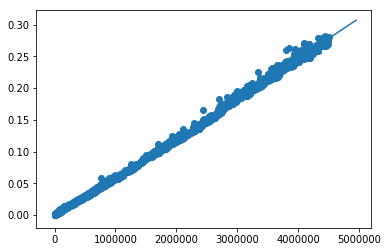

In [5]:
nlogn['nlogn'] = nlogn.n.apply(lambda x: x*np.log(x))

X = nlogn[['n', 'nlogn']]
y = nlogn['mean']

model_nlogn = LinearRegression().fit(X, y)

xs = np.arange(start=5, stop=5000000, step=50000)
M = pd.DataFrame(data={'n':xs, 'nlogn':xs*np.log(xs)})
ys = model_nlogn.predict(M)

plt.plot(xs,ys);
plt.scatter(nlogn['n'], y);

In [6]:
def plotComplexity(a, b, plot_nlogn, plot_quadratic, plot_cubic):
    if a >= b:
        print ("invalid range")
        return
    
    samples = 100
    xs = np.arange(start=a, stop=b, step=(b-a)/samples)
    M = pd.DataFrame(data={'n':xs, 'nlogn':xs*np.log(xs), 'n^2': np.power(xs, 2), 'n^3':np.power(xs, 3)})
    y_nlogn = model_nlogn.predict(M[['n', 'nlogn']])
    y_quad = model_quad.predict(M[['n', 'n^2']])
    y_cub = model_cub.predict(M[['n', 'n^2', 'n^3']])
    
    plt.figure(figsize=(15, 6))
    if plot_nlogn:
        plt.plot(xs, y_nlogn, color="green", label="nlogn")
    if plot_quadratic:
        plt.plot(xs, y_quad, color="orange", label="quad")
    if plot_cubic:
        plt.plot(xs, y_cub, color="red", label="cub")

### Резултат

Отдолу са plot-нати трите графики на алгоритмите. *Зелената* е най-бързата (nlogn), *жълтата* е квадратичната и *червената* е кубичната. По x пише големина на входния масив, а по y пише колко секунди трябват на алгоритъма да приключи.
Графиката ще е в интервала `[a, b]`.

**N.B.** Графиката е разтегната и може някоя функция да изглежда като константна или линейна -- не е, просто така е визуализирана. Използвайте тикчетата, за да махнете бързо растящите функции, когато те доминират другите.

In [7]:
interact (plotComplexity, a=widgets.IntSlider(min=100, max=1e6, value=1e2),
         b=widgets.IntSlider(min=1, max=1e6, value=1e3),
         plot_nlogn=True,
         plot_quadratic=True,
         plot_cubic=True);

interactive(children=(IntSlider(value=100, description='a', max=1000000, min=100), IntSlider(value=1000, descr…

### Заключение

Вижда се, че има голяма разлика в алгоритмите откъм скорост. За всички реалистични входове, nlogn решението работи мигновенно, докато
при n = 1 милион ще трябва да чакаме 2е8 секунди, което е **малко над 6 години**!